In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df = pd.read_csv('/content/online_retail_listing.csv', sep=';', encoding='latin-1')

In [117]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,"6,95",13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,"2,1",13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,"1,25",13085.0,United Kingdom


In [118]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price           object
Customer ID    float64
Country         object
dtype: object

In [119]:
# Change Price Data Type
df['Price'] = df['Price'].str.replace(',', '.')
df['Price'] = df['Price'].astype('float64')

In [120]:
df.info()
# Indicated null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  float64
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 64.0+ MB


In [121]:
df.duplicated().value_counts()

False    1014425
True       34150
Name: count, dtype: int64

In [122]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [123]:
df['Customer ID'].isnull().value_counts()

Customer ID
False    785599
True     228826
Name: count, dtype: int64

In [124]:
# CustomerID has null, we need to drop this, because customerid is an important variable
df.dropna(subset=['Customer ID'], inplace=True)

In [125]:
# Checking does Description still has null, apparently it doesn't
df.Description.isnull().value_counts()

Description
False    785599
Name: count, dtype: int64

In [126]:
df.describe()

,Quantity,Price,Customer ID
count,785599.000000,785599.000000,785599.000000
mean,12.611412,3.716362,15313.078667
std,143.474332,71.912928,1695.992802
min,-74215.000000,0.000000,12346.000000
25%,2.000000,1.250000,13963.000000
50%,5.000000,1.950000,15235.000000
75%,12.000000,3.750000,16788.000000
max,74215.000000,38970.000000,18287.000000


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 785599 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      785599 non-null  object 
 1   StockCode    785599 non-null  object 
 2   Description  785599 non-null  object 
 3   Quantity     785599 non-null  int64  
 4   InvoiceDate  785599 non-null  object 
 5   Price        785599 non-null  float64
 6   Customer ID  785599 non-null  float64
 7   Country      785599 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 53.9+ MB


In [128]:
# Checking InvoiceDate contain NaN
nullindate = df.InvoiceDate == 'NaN'
nullindate.value_counts()

InvoiceDate
False    785599
Name: count, dtype: int64

**Recency**

In [129]:
df['InvoiceDate'].max()
# Present day is 2012-12-05

'9.12.2010 20:01'

In [130]:
# Change Date Data Type

# RFM Values of each customer
# Recency
# understanting when it was the last time customer interacted with us
present_day = '2012-12-05'
present_day = pd.to_datetime(present_day)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d.%m.%Y %H:%M')

df['Recency'] = (present_day - df['InvoiceDate']).dt.days
df.head()
# recency is the last day the customer made contact with us

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Recency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,1099
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1099
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1099
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,1099
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,1099


**Frequency**

In [131]:
df.duplicated().value_counts()
# clean from duplicates

False    785599
Name: count, dtype: int64

In [132]:
# Frequency
frequency = df.groupby(['Customer ID'])['Invoice'].count().reset_index()

In [133]:
frequency.head(10)
# meaning that for example, customer with ..46 connected as 47 or purchased our product /services 47 times

,Customer ID,Invoice
0,12346.0,47
1,12347.0,211
2,12348.0,51
3,12349.0,180
4,12350.0,17
5,12351.0,21
6,12352.0,113
7,12353.0,24
8,12354.0,58
9,12355.0,35


In [134]:
frequency.rename(columns={'Invoice':'Frequency'}, inplace=True)
df = df.merge(frequency, on='Customer ID', how='left')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Recency,Frequency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,1099,92
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1099,92
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1099,92
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,1099,92
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,1099,92


**Monetary**

In [135]:
# Monetary by multiplying Quantity and Price
df['Total_Amount'] = df['Quantity']*df['Price']

In [136]:
monetary = df.groupby('Customer ID')['Total_Amount'].sum().reset_index()
monetary
# we need to check this

,Customer ID,Total_Amount
0,12346.0,-51.74
1,12347.0,4696.71
2,12348.0,2019.40
3,12349.0,4404.54
4,12350.0,334.40
...,...,...
5919,18283.0,2456.90
5920,18284.0,436.68
5921,18285.0,427.00
5922,18286.0,1188.43


In [137]:
monetary.sort_values(by='Total_Amount', ascending=True)

,Customer ID,Total_Amount
5038,17399.0,-25111.09
567,12918.0,-10953.50
3491,15849.0,-5876.34
3402,15760.0,-5795.87
4620,16981.0,-4620.86
...,...,...
5089,17450.0,231390.55
2556,14911.0,259455.94
1802,14156.0,296063.44
2291,14646.0,511614.05


In [138]:
df[df['Customer ID']==17399.0]
# we now understand that ngeative values caused by cancelation

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Recency,Frequency,Total_Amount
185963,C512770,M,Manual,-1,2010-06-17 16:52:00,25111.09,17399.0,United Kingdom,901,1,-25111.09


In [139]:
df[df['Customer ID']==12346.0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Recency,Frequency,Total_Amount
21447,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.50,12346.0,United Kingdom,1086,47,45.00
21702,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.50,12346.0,United Kingdom,1086,47,22.50
21705,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.50,12346.0,United Kingdom,1086,47,22.50
28492,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.50,12346.0,United Kingdom,1082,47,22.50
28504,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.00,12346.0,United Kingdom,1082,47,1.00
31276,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0,United Kingdom,1065,47,22.50
31278,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0,United Kingdom,1065,47,22.50
37892,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,4.50,12346.0,United Kingdom,1055,47,22.50
44909,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,4.50,12346.0,United Kingdom,1047,47,22.50
49055,C495800,ADJUST,Adjustment by john on 26/01/2010 17,-1,2010-01-26 17:27:00,103.50,12346.0,United Kingdom,1043,47,-103.50


In [140]:
monetary.rename(columns={'Total_Amount':'Monetary'}, inplace=True)
df = df.merge(monetary, on='Customer ID', how='left')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Recency,Frequency,Total_Amount,Monetary
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,1099,92,83.4,1459.46
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1099,92,81.0,1459.46
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1099,92,81.0,1459.46
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,1099,92,100.8,1459.46
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,1099,92,30.0,1459.46


**RFM SCORES**

In [141]:
RFM = df[['Customer ID', 'Recency', 'Frequency', 'Monetary']]

In [142]:
RFM

,Customer ID,Recency,Frequency,Monetary
0,13085.0,1099,92,1459.46
1,13085.0,1099,92,1459.46
2,13085.0,1099,92,1459.46
3,13085.0,1099,92,1459.46
4,13085.0,1099,92,1459.46
...,...,...,...,...
785594,14546.0,366,828,5002.97
785595,14546.0,366,828,5002.97
785596,16931.0,366,869,4638.16
785597,16931.0,366,869,4638.16


In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(RFM)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

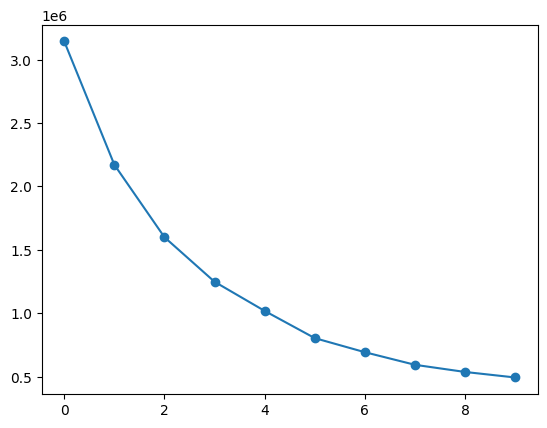

In [144]:
# finding the number of similar cluster using ELBOW METHOD
# finding the best Kmeans
from sklearn.cluster import KMeans

inertia =[]
for i in np.arange(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(scaled)
  inertia.append(kmeans.inertia_)

plt.plot(inertia, marker='o')

we have 5 clusters

**Calculating RFM Scores**



In [145]:
# Define Scoring criteria
recency_scores = [5,4,3,2,1] # high score for low recency
frequency_scores = [1,2,3,4,5] # high score for high frequency
monetary_scores = [1,2,3,4,5] # high score for high monetary


# Calculate RFM Scores
df['Recency_scores'] = pd.cut(df['Recency'], bins=5, labels=recency_scores)
df['Frequency_scores'] = pd.cut(df['Frequency'], bins=5, labels=frequency_scores)
df['Monetary_scores'] = pd.cut(df['Monetary'], bins=5, labels=monetary_scores)

In [146]:
df['Recency_scores'] = df['Recency_scores'].astype(int)
df['Frequency_scores'] = df['Frequency_scores'].astype(int)
df['Monetary_scores'] = df['Monetary_scores'].astype(int)

**RFM Segementations**

In [147]:
# calculate RFM by combining individual R, F, M scores
df['RFM_score'] = df['Recency_scores'] + df['Frequency_scores'] + df['Monetary_scores']

# RFM Segment
labels = ['Low-Value', 'Mid-Value', 'High-Value']
df['RFM_segments'] = pd.qcut(df['RFM_score'], q=3, labels=labels)

In [148]:
# import the plotly.express module
import plotly.express as px

# RFM Segment Distributions
segment_counts = df['RFM_segments'].value_counts().reset_index()
segment_counts.columns = ['RFM_segments', 'Count']

# color
pastel = px.colors.qualitative.Pastel

# Bar Chart
fig_segment_bar = px.bar(segment_counts, x='RFM_segments', y='Count',
                         color='RFM_segments', color_discrete_sequence=pastel,
                         title = 'RFM Value Segment Distribution')

# Update the layout
fig_segment_bar.update_layout(xaxis_title='RFM Value Segment', yaxis_title='Count', showlegend = False)

# Show the chart
fig_segment_bar.show()

**RFM Customer Segments**

In [149]:
df['RFM_score'].value_counts()

RFM_score
7     193866
5     173930
4     130411
6     123474
3     117533
8      16304
9       9896
11      8063
10      6073
13      3588
12      2461
Name: count, dtype: int64

In [150]:
# New Column for RFM Customer Segments
# df['Recency_scores'] + df['Frequncy_scores'] + df['Monetary_scores']
df['RFM_Customer_Segments'] = ''


# Assign RFM segments based on the RFM_Customer_Segments
df.loc[df['RFM_score'] >=9, 'RFM_Customer_Segments'] = 'Champions'
df.loc[(df['RFM_score'] >=6) & (df['RFM_score'] <9), 'RFM_Customer_Segments'] = 'Potential Loyalists'
df.loc[(df['RFM_score'] >=5) & (df['RFM_score'] <6), 'RFM_Customer_Segments'] = 'At Risk Customers'
df.loc[(df['RFM_score'] >=4) & (df['RFM_score'] <5), 'RFM_Customer_Segments'] ="Can't Lost Customers"
df.loc[(df['RFM_score'] >=3) & (df['RFM_score'] <4), 'RFM_Customer_Segments'] ='Lost Customers'

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Recency,Frequency,Total_Amount,Monetary,Recency_scores,Frequency_scores,Monetary_scores,RFM_score,RFM_segments,RFM_Customer_Segments
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,1099,92,83.4,1459.46,1,1,1,3,Low-Value,Lost Customers
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1099,92,81.0,1459.46,1,1,1,3,Low-Value,Lost Customers
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1099,92,81.0,1459.46,1,1,1,3,Low-Value,Lost Customers
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,1099,92,100.8,1459.46,1,1,1,3,Low-Value,Lost Customers
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,1099,92,30.0,1459.46,1,1,1,3,Low-Value,Lost Customers


In [151]:
final_segment = df.groupby(['RFM_segments', 'RFM_Customer_Segments']).size().reset_index(name='Count')
final_segment = final_segment.sort_values(by='Count', ascending=False)
fig_treemap_final_segment = px.treemap(final_segment,
                                       path=['RFM_segments', 'RFM_Customer_Segments'],
                                       values='Count',
                                       color='RFM_segments', color_discrete_sequence=px.colors.qualitative.Pastel,
                                       title='RFM Customer Segments by Value')

fig_treemap_final_segment.show()

**RFM Distribution**

In [155]:
# Import necessary libraries
import plotly.graph_objects as go

# Filter Data include 'Champion'
champion = df[df['RFM_Customer_Segments']=='Champions']

fig = go.Figure()
fig.add_trace(go.Box(y=champion['Recency_scores'], name='Recency'))
fig.add_trace(go.Box(y=champion['Frequency_scores'], name='Frequency'))
fig.add_trace(go.Box(y=champion['Monetary_scores'], name='Monetary'))

fig.update_layout(title='RFM Value Distribution within Champion Segment',
                  yaxis_title='RFM Value', showlegend=False)

fig.show()

**Correlation**

In [158]:
corr_matrix = champion[['Recency_scores', 'Frequency_scores', 'Monetary_scores']].corr()

# Visualize
fig_heatmap = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu',
    colorbar=dict(title='Correlation')
))
fig_heatmap.update_layout(title='RFM Correlation Matrix within Champions Segment')
fig_heatmap.show()

**All Segments**

<ipython-input-161-888d94fd25dc>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




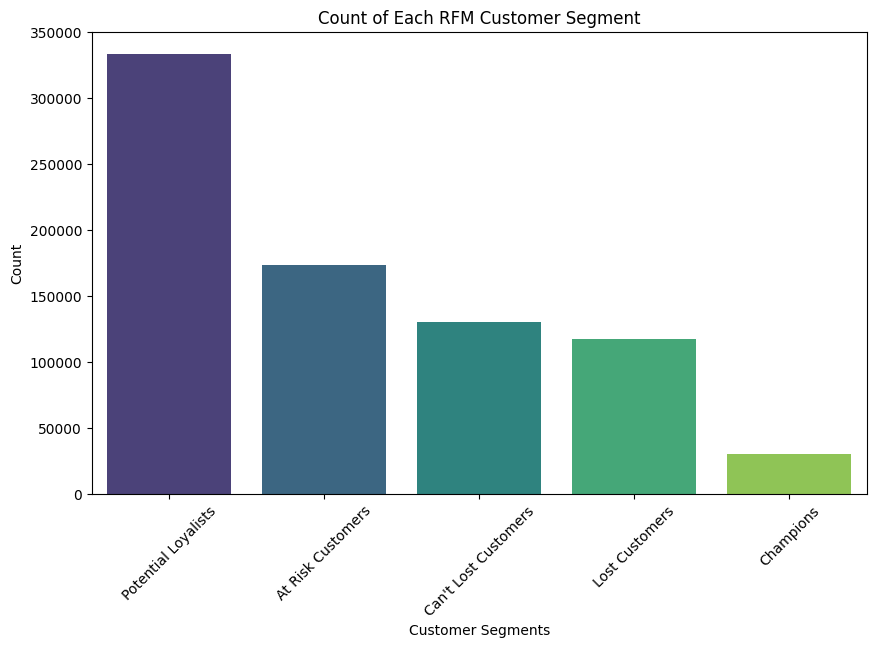

In [161]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data: Count the occurrences of each RFM Customer Segment
segments = df['RFM_Customer_Segments'].value_counts().reset_index()
segments.columns = ['Customer_Segments', 'Count']

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer_Segments', y='Count', data=segments, palette='viridis')
plt.title('Count of Each RFM Customer Segment')
plt.xlabel('Customer Segments')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [167]:
# Compare Recency, Frequency, Monetary in each segment

# Calculate the AVG R,F,M for each sement
segment_avg = df.groupby('RFM_Customer_Segments')[['Recency_scores', 'Frequency_scores', 'Monetary_scores']].mean().reset_index()

# Create bar for Recency
fig2 = go.Figure()
fig2.add_trace(go.Bar(
    x=segment_avg['RFM_Customer_Segments'],
    y=segment_avg['Recency_scores'],
    name='Recency Score',
    marker_color='rgb(158,202,225)'
))

# Frequency Bar
fig2.add_trace(go.Bar(
    x=segment_avg['RFM_Customer_Segments'],
    y=segment_avg['Frequency_scores'],
    name='Frequency Score',
    marker_color='rgb(94,158,217)'
))

# Monetary Bar
fig2.add_trace(go.Bar(
    x=segment_avg['RFM_Customer_Segments'],
    y=segment_avg['Monetary_scores'],
    name='Monetary Score',
    marker_color='rgb(32,102,148)'
))

# Update layout
fig2.update_layout(
    title='RFM Segments Comparasion based on R,F,M Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Average Score',
    barmode='group',
    showlegend=True
)

fig2.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM['Clusters']=(kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
RFM

,Recency,Frequency,Monetary,Clusters
Customer ID,,,,
12346.0,347,17,155177.60,0
12347.0,61,7,5408.50,2
12348.0,97,5,2019.40,2
12349.0,40,5,4452.84,2
12350.0,332,1,334.40,1
...,...,...,...,...
18283.0,31,21,2528.65,2
18284.0,451,2,486.68,1
18285.0,682,1,427.00,1


In [ ]:
# to change the cluster indexing systme into 1,2,3
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM['Clusters']=(kmeans.labels_ +1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
RFM

,Recency,Frequency,Monetary,Clusters
Customer ID,,,,
12346.0,347,17,155177.60,2
12347.0,61,7,5408.50,1
12348.0,97,5,2019.40,1
12349.0,40,5,4452.84,1
12350.0,332,1,334.40,3
...,...,...,...,...
18283.0,31,21,2528.65,1
18284.0,451,2,486.68,3
18285.0,682,1,427.00,3


In [ ]:
group = RFM.groupby(['Clusters'])[['Recency', 'Frequency', 'Monetary']].mean()
group

,Recency,Frequency,Monetary
Clusters,,,
1,92.705271,9.053493,3215.708775
2,58.600000,166.080000,166661.649280
3,487.956055,2.568848,827.896071


* Cluster 1 = is the customer who are not loyal to us
* Cluster 2 = is the customer who are loyal to us
* Cluster 3 = is the customer who ocassionaly loyal to us

In [ ]:
def func(row):
  if row['Clusters'] == 1:
    return 'Cold Customer'
  elif row['Clusters'] ==2:
    return 'Loyal Customer'
  else:
    return 'Warm Customer'

In [ ]:
RFM['Conditions'] = RFM.apply(func, axis=1)

In [ ]:
RFM

,Recency,Frequency,Monetary,Clusters,Conditions
Customer ID,,,,,
12346.0,347,17,155177.60,2,Loyal Customer
12347.0,61,7,5408.50,1,Cold Customer
12348.0,97,5,2019.40,1,Cold Customer
12349.0,40,5,4452.84,1,Cold Customer
12350.0,332,1,334.40,3,Warm Customer
...,...,...,...,...,...
18283.0,31,21,2528.65,1,Cold Customer
18284.0,451,2,486.68,3,Warm Customer
18285.0,682,1,427.00,3,Warm Customer


In [ ]:
result = RFM['Conditions'].value_counts()

In [ ]:
result

Conditions
Cold Customer     3851
Warm Customer     2048
Loyal Customer      25
Name: count, dtype: int64

<Axes: ylabel='Conditions'>

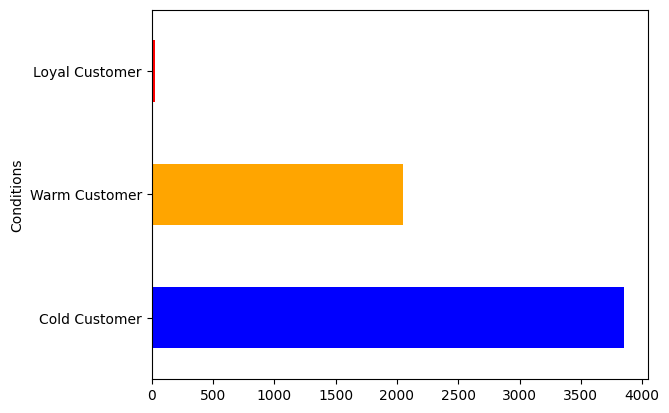

In [ ]:
result.plot(kind='barh', color=['blue', 'orange', 'red'])

In [ ]:
RFM.to_csv('RFM_results.csv')